In [1100]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as auto_arima

In [1101]:
df1 = pd.read_csv("yield_df.csv")

In [1102]:
df1

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [1103]:
df1.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [1104]:
df_test= df1[["Year","Item","hg/ha_yield"]]

In [1105]:
df_test

,Year,Item,hg/ha_yield
0,1990,Maize,36613
1,1990,Potatoes,66667
2,1990,"Rice, paddy",23333
3,1990,Sorghum,12500
4,1990,Soybeans,7000
...,...,...,...
28237,2013,"Rice, paddy",22581
28238,2013,Sorghum,3066
28239,2013,Soybeans,13142
28240,2013,Sweet potatoes,22222


In [1106]:
df_test1= df_test.groupby(["Year","Item"],as_index=False).mean()

In [1107]:
df_test1

,Year,Item,hg/ha_yield
0,1990,Cassava,119292.738636
1,1990,Maize,27706.041916
2,1990,Plantains and others,107239.208333
3,1990,Potatoes,173127.063953
4,1990,"Rice, paddy",35196.409722
...,...,...,...
225,2013,Sorghum,20332.654676
226,2013,Soybeans,17989.097902
227,2013,Sweet potatoes,139882.539062
228,2013,Wheat,35204.421053


In [1108]:
pivot_df_multi = df_test1.pivot_table(index='Year', columns='Item', values='hg/ha_yield', aggfunc='mean')


In [1109]:
df_test1_1 = pivot_df_multi.reset_index()

In [1110]:
df_test1_1

Item,Year,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
0,1990,119292.738636,27706.041916,107239.208333,173127.063953,35196.409722,16479.443548,15466.719697,105421.804878,26774.122581,102800.228571
1,1991,123852.761364,27900.958084,108768.708333,169009.000000,35318.777778,15901.822581,15189.908397,105426.065041,27297.529032,103059.083333
2,1992,126751.516854,27962.977528,103993.291667,171164.989130,36385.000000,17012.915385,14983.492754,108816.838710,26523.952096,102729.944444
3,1993,127019.561798,28997.363128,105399.375000,174366.843243,35967.229730,17001.776923,15505.345324,106974.040000,26972.523810,101499.500000
4,1994,130528.955056,28344.642458,105555.750000,175015.697297,36654.081633,15990.705426,15700.302158,112618.976000,26786.023810,106840.111111
5,1995,135052.123596,29200.106145,108046.000000,179542.600000,37194.829932,16079.630769,15871.769784,109643.448000,27112.952381,107747.750000
6,1996,127985.494382,30763.502793,103516.708333,183527.491892,37111.795918,17189.576923,16157.841727,108298.784000,28308.845238,106690.388889
7,1997,126310.359551,31915.184358,103477.500000,186404.416216,37543.578231,17356.523077,16353.007194,113712.690476,28216.857143,109758.540541
8,1998,135821.213483,32526.022346,104212.583333,182332.556757,38264.727891,17245.146154,16604.776978,113724.436508,28712.630952,108553.405405
9,1999,137388.707865,33003.357542,105620.250000,192202.324324,39580.448980,18476.612403,17719.705036,114306.214286,28781.779762,114722.567568


In [1111]:
full_years = pd.DataFrame({'Year': range(df_test1_1['Year'].min(), df_test1_1['Year'].max() + 1)})

In [1112]:
df= pd.merge(full_years, df_test1_1, on='Year', how='left')
df


,Year,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
0,1990,119292.738636,27706.041916,107239.208333,173127.063953,35196.409722,16479.443548,15466.719697,105421.804878,26774.122581,102800.228571
1,1991,123852.761364,27900.958084,108768.708333,169009.000000,35318.777778,15901.822581,15189.908397,105426.065041,27297.529032,103059.083333
2,1992,126751.516854,27962.977528,103993.291667,171164.989130,36385.000000,17012.915385,14983.492754,108816.838710,26523.952096,102729.944444
3,1993,127019.561798,28997.363128,105399.375000,174366.843243,35967.229730,17001.776923,15505.345324,106974.040000,26972.523810,101499.500000
4,1994,130528.955056,28344.642458,105555.750000,175015.697297,36654.081633,15990.705426,15700.302158,112618.976000,26786.023810,106840.111111
5,1995,135052.123596,29200.106145,108046.000000,179542.600000,37194.829932,16079.630769,15871.769784,109643.448000,27112.952381,107747.750000
6,1996,127985.494382,30763.502793,103516.708333,183527.491892,37111.795918,17189.576923,16157.841727,108298.784000,28308.845238,106690.388889
7,1997,126310.359551,31915.184358,103477.500000,186404.416216,37543.578231,17356.523077,16353.007194,113712.690476,28216.857143,109758.540541
8,1998,135821.213483,32526.022346,104212.583333,182332.556757,38264.727891,17245.146154,16604.776978,113724.436508,28712.630952,108553.405405
9,1999,137388.707865,33003.357542,105620.250000,192202.324324,39580.448980,18476.612403,17719.705036,114306.214286,28781.779762,114722.567568


In [1113]:
def moving_average(series, window=3):
    return series.rolling(window=window, center=True, min_periods=1).mean()


In [1114]:
for column in df.columns:
    if column != 'Year':
        df[column] = moving_average(df[column])


In [1115]:
df1_tweaked = df
df1_tweaked 

,Year,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
0,1990,121572.750000,27803.500000,108003.958333,171068.031977,35257.593750,16190.633065,15328.314047,105423.934959,27035.825806,102929.655952
1,1991,123299.005618,27856.659176,106667.069444,171100.351028,35633.395833,16464.727171,15213.373616,106554.902876,26865.201236,102863.085450
2,1992,125874.613338,28287.099580,106053.791667,171513.610791,35890.335836,16638.838296,15226.248825,107072.314583,26931.334979,102429.509259
3,1993,128100.011236,28434.994372,104982.805556,173515.843224,36335.437121,16668.465911,15396.380079,109469.951570,26760.833238,103689.851852
4,1994,130866.880150,28847.370577,106333.708333,176308.380180,36605.380431,16357.371040,15692.472422,109745.488000,26957.166667,105362.453704
5,1995,131188.857678,29436.083799,105706.152778,179361.929730,36986.902494,16419.971040,15909.971223,110187.069333,27402.607143,107092.750000
6,1996,129782.659176,30626.264432,105013.402778,183158.169369,37283.401361,16875.243590,16127.539568,110551.640825,27879.551587,108065.559810
7,1997,130039.022472,31734.903166,103735.597222,184088.154955,37640.034014,17263.748718,16371.875300,111911.970328,28412.777778,108334.111612
8,1998,133173.426966,32481.521415,104436.777778,186979.765766,38462.918367,17692.760545,16892.496403,113914.447090,28570.422619,111011.504505
9,1999,139500.973783,33040.000703,104859.875000,189720.607419,38964.925170,18085.476771,16858.865433,115570.912698,29137.044203,113817.180180


In [1116]:
# Use .loc to explicitly modify the DataFrame
df1_tweaked.loc[:, 'Year'] = pd.to_datetime(df1_tweaked['Year'], format='%Y')
df1_tweaked.set_index('Year', inplace=True)

In [1117]:
df1_tweaked = df1_tweaked.resample('Y').mean() 

In [1118]:
df1_tweaked = df1_tweaked.dropna()
df1_tweaked

,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
Year,,,,,,,,,,
1990-12-31,121572.750000,27803.500000,108003.958333,171068.031977,35257.593750,16190.633065,15328.314047,105423.934959,27035.825806,102929.655952
1991-12-31,123299.005618,27856.659176,106667.069444,171100.351028,35633.395833,16464.727171,15213.373616,106554.902876,26865.201236,102863.085450
1992-12-31,125874.613338,28287.099580,106053.791667,171513.610791,35890.335836,16638.838296,15226.248825,107072.314583,26931.334979,102429.509259
1993-12-31,128100.011236,28434.994372,104982.805556,173515.843224,36335.437121,16668.465911,15396.380079,109469.951570,26760.833238,103689.851852
1994-12-31,130866.880150,28847.370577,106333.708333,176308.380180,36605.380431,16357.371040,15692.472422,109745.488000,26957.166667,105362.453704
1995-12-31,131188.857678,29436.083799,105706.152778,179361.929730,36986.902494,16419.971040,15909.971223,110187.069333,27402.607143,107092.750000
1996-12-31,129782.659176,30626.264432,105013.402778,183158.169369,37283.401361,16875.243590,16127.539568,110551.640825,27879.551587,108065.559810
1997-12-31,130039.022472,31734.903166,103735.597222,184088.154955,37640.034014,17263.748718,16371.875300,111911.970328,28412.777778,108334.111612
1998-12-31,133173.426966,32481.521415,104436.777778,186979.765766,38462.918367,17692.760545,16892.496403,113914.447090,28570.422619,111011.504505


<Axes: xlabel='Year'>

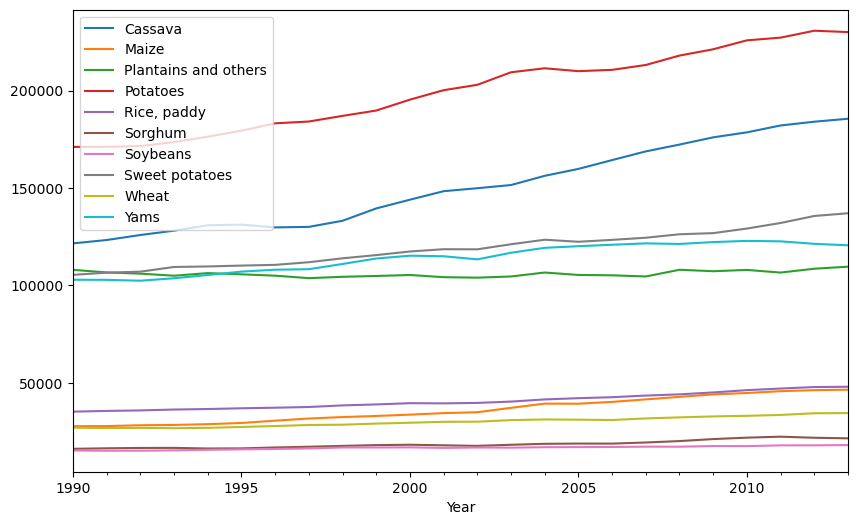

In [1119]:
df1_tweaked.plot(figsize=(10,6))

In [1120]:
df1_tweaked.describe()

,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,150603.944524,36242.372394,105995.345984,199670.615890,40697.353491,18582.463078,16720.211815,119030.275489,30104.713259,114115.938821
std,21522.483618,6576.457501,1591.273044,20446.866378,4085.886723,1978.754313,886.696131,9259.500370,2536.253267,7333.967677
min,121572.750000,27803.500000,103735.597222,171068.031977,35257.593750,16190.633065,15213.373616,105423.934959,26760.833238,102429.509259
25%,130659.915730,30328.719274,104795.385417,182209.109459,37209.276644,16823.549170,16073.147482,110460.497952,27760.315476,107822.357357
50%,149109.952247,34735.571296,105546.041667,201535.499554,39669.531746,18174.852844,16879.328392,118557.348545,30080.617357,115114.175676
75%,169639.199438,41878.680018,106824.330139,214295.472222,43665.568786,19617.930497,17281.184606,124919.799603,31916.849666,120975.042793
max,185502.174157,46532.654891,109618.080000,230664.888436,48023.616667,22414.296569,18095.392701,137030.988281,34514.710526,122856.657658


In [1121]:
df_test2= df1[["Year","average_rain_fall_mm_per_year","avg_temp","pesticides_tonnes"]]


In [1131]:
df_test2

,Year,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
0,1990,1171.921821,20.894777,28225.816143
1,1991,1171.410653,20.693746,28176.390902
2,1992,1147.556194,20.128310,27758.403716
3,1993,1145.420278,20.173639,27789.425078
4,1994,1146.007371,20.401826,27676.467649
5,1995,1145.142390,20.408322,28859.442586
6,1996,1146.045827,20.119656,29630.951538
7,1997,1148.073529,20.336225,30793.990278
8,1998,1148.073529,20.740196,31984.078170
9,1999,1148.646770,20.513712,32277.875356


In [1132]:
df_test2= df_test2.groupby(["Year"],as_index=False).mean()

In [1133]:
df_test2

,Year,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
0,1990,1171.921821,20.894777,28225.816143
1,1991,1171.410653,20.693746,28176.390902
2,1992,1147.556194,20.128310,27758.403716
3,1993,1145.420278,20.173639,27789.425078
4,1994,1146.007371,20.401826,27676.467649
5,1995,1145.142390,20.408322,28859.442586
6,1996,1146.045827,20.119656,29630.951538
7,1997,1148.073529,20.336225,30793.990278
8,1998,1148.073529,20.740196,31984.078170
9,1999,1148.646770,20.513712,32277.875356


In [1134]:
full_years1 = pd.DataFrame({'Year': range(df_test2['Year'].min(), df_test2['Year'].max() + 1)})

In [1135]:
df2= pd.merge(full_years1, df_test2, on='Year', how='left')
df2

,Year,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
0,1990,1171.921821,20.894777,28225.816143
1,1991,1171.410653,20.693746,28176.390902
2,1992,1147.556194,20.128310,27758.403716
3,1993,1145.420278,20.173639,27789.425078
4,1994,1146.007371,20.401826,27676.467649
5,1995,1145.142390,20.408322,28859.442586
6,1996,1146.045827,20.119656,29630.951538
7,1997,1148.073529,20.336225,30793.990278
8,1998,1148.073529,20.740196,31984.078170
9,1999,1148.646770,20.513712,32277.875356


In [1136]:
def moving_average(series, window=3):
    return series.rolling(window=window, center=True, min_periods=1).mean()


In [1137]:
for column in df2.columns:
    if column != 'Year':
        df2[column] = moving_average(df2[column])


In [1138]:
df2_tweaked = df2
df2_tweaked 

,Year,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
0,1990,1171.666237,20.794261,28201.103522
1,1991,1163.629556,20.572277,28053.536920
2,1992,1154.795708,20.331898,27908.073232
3,1993,1146.327948,20.234592,27741.432148
4,1994,1145.523346,20.327929,28108.445104
5,1995,1145.731862,20.309935,28722.287258
6,1996,1146.420582,20.288068,29761.461467
7,1997,1147.397628,20.398693,30803.006662
8,1998,1148.264610,20.530045,31685.314601
9,1999,1147.711103,20.564403,32551.921224


In [1139]:
# Use .loc to explicitly modify the DataFrame
df2_tweaked.loc[:, 'Year'] = pd.to_datetime(df2_tweaked['Year'], format='%Y')
df2_tweaked.set_index('Year', inplace=True)

In [1140]:
df2_tweaked = df2_tweaked.resample('Y').mean() 

In [1141]:
df2_tweaked = df2_tweaked.dropna()
df2_tweaked

,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,
1990-12-31,1171.666237,20.794261,28201.103522
1991-12-31,1163.629556,20.572277,28053.536920
1992-12-31,1154.795708,20.331898,27908.073232
1993-12-31,1146.327948,20.234592,27741.432148
1994-12-31,1145.523346,20.327929,28108.445104
1995-12-31,1145.731862,20.309935,28722.287258
1996-12-31,1146.420582,20.288068,29761.461467
1997-12-31,1147.397628,20.398693,30803.006662
1998-12-31,1148.264610,20.530045,31685.314601


<Axes: xlabel='Year'>

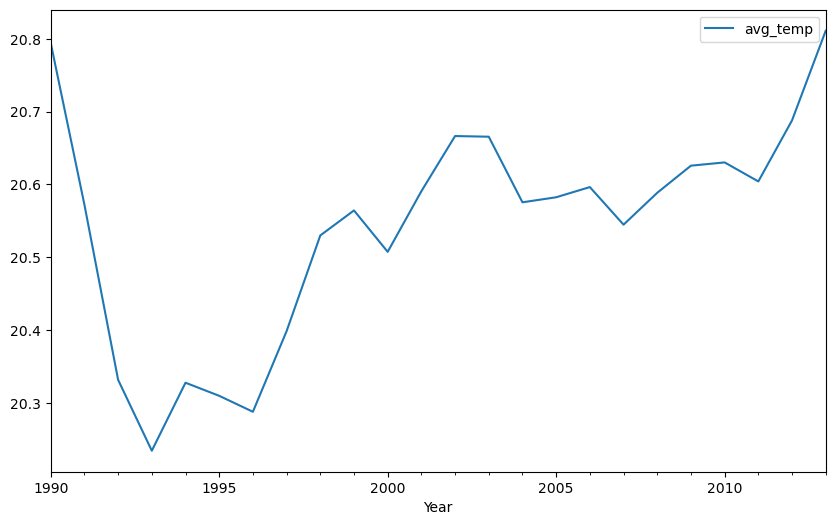

In [1142]:
df2_tweaked .plot(y="avg_temp",figsize=(10,6))

<Axes: xlabel='Year'>

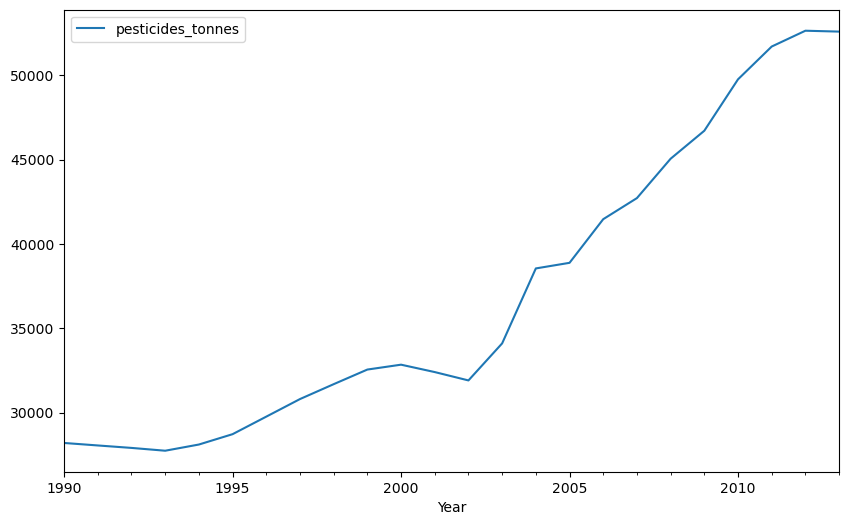

In [1143]:
df2_tweaked .plot(y="pesticides_tonnes",figsize=(10,6))

<Axes: xlabel='Year'>

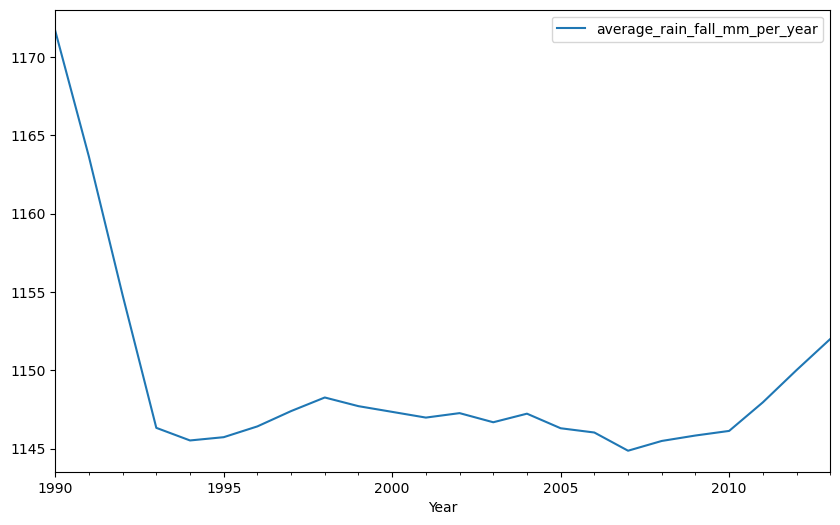

In [1144]:
df2_tweaked .plot(y="average_rain_fall_mm_per_year",figsize=(10,6))

In [1145]:
inner_join = pd.merge(df1_tweaked, df2_tweaked, on='Year', how='inner')

In [1146]:
inner_join 

,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,,,,,,,,,,,
1990-12-31,121572.750000,27803.500000,108003.958333,171068.031977,35257.593750,16190.633065,15328.314047,105423.934959,27035.825806,102929.655952,1171.666237,20.794261,28201.103522
1991-12-31,123299.005618,27856.659176,106667.069444,171100.351028,35633.395833,16464.727171,15213.373616,106554.902876,26865.201236,102863.085450,1163.629556,20.572277,28053.536920
1992-12-31,125874.613338,28287.099580,106053.791667,171513.610791,35890.335836,16638.838296,15226.248825,107072.314583,26931.334979,102429.509259,1154.795708,20.331898,27908.073232
1993-12-31,128100.011236,28434.994372,104982.805556,173515.843224,36335.437121,16668.465911,15396.380079,109469.951570,26760.833238,103689.851852,1146.327948,20.234592,27741.432148
1994-12-31,130866.880150,28847.370577,106333.708333,176308.380180,36605.380431,16357.371040,15692.472422,109745.488000,26957.166667,105362.453704,1145.523346,20.327929,28108.445104
1995-12-31,131188.857678,29436.083799,105706.152778,179361.929730,36986.902494,16419.971040,15909.971223,110187.069333,27402.607143,107092.750000,1145.731862,20.309935,28722.287258
1996-12-31,129782.659176,30626.264432,105013.402778,183158.169369,37283.401361,16875.243590,16127.539568,110551.640825,27879.551587,108065.559810,1146.420582,20.288068,29761.461467
1997-12-31,130039.022472,31734.903166,103735.597222,184088.154955,37640.034014,17263.748718,16371.875300,111911.970328,28412.777778,108334.111612,1147.397628,20.398693,30803.006662
1998-12-31,133173.426966,32481.521415,104436.777778,186979.765766,38462.918367,17692.760545,16892.496403,113914.447090,28570.422619,111011.504505,1148.264610,20.530045,31685.314601


In [1147]:
corr_matrix = inner_join.corr()

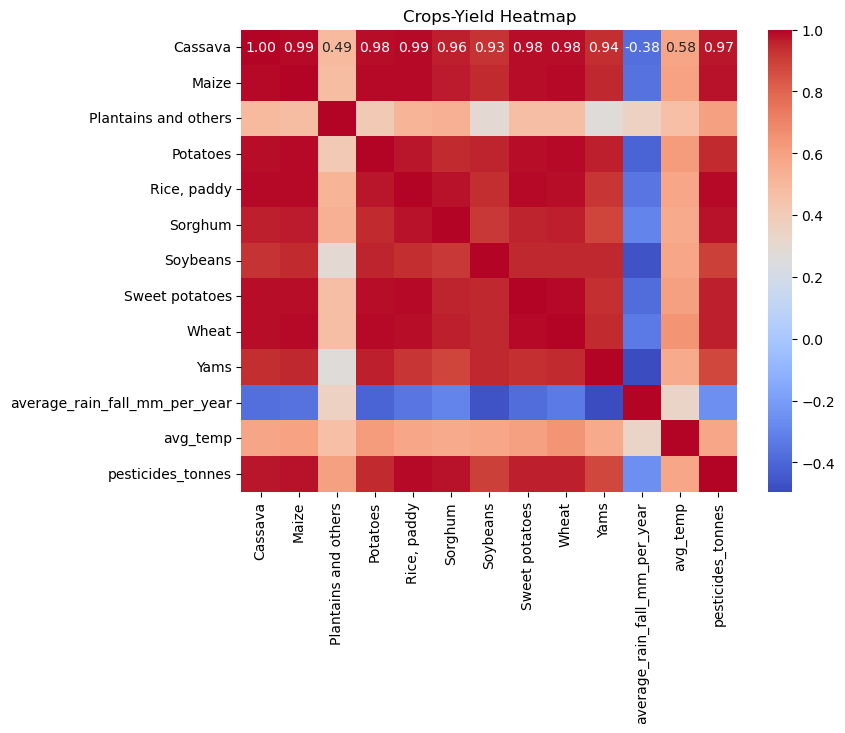

In [1148]:

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)


plt.title("Crops-Yield Heatmap")


plt.show()

In [1149]:
Cassava_df= inner_join[["Cassava","average_rain_fall_mm_per_year","avg_temp","pesticides_tonnes"]]

In [1150]:
Cassava_df

,Cassava,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,,
1990-12-31,121572.750000,1171.666237,20.794261,28201.103522
1991-12-31,123299.005618,1163.629556,20.572277,28053.536920
1992-12-31,125874.613338,1154.795708,20.331898,27908.073232
1993-12-31,128100.011236,1146.327948,20.234592,27741.432148
1994-12-31,130866.880150,1145.523346,20.327929,28108.445104
1995-12-31,131188.857678,1145.731862,20.309935,28722.287258
1996-12-31,129782.659176,1146.420582,20.288068,29761.461467
1997-12-31,130039.022472,1147.397628,20.398693,30803.006662
1998-12-31,133173.426966,1148.264610,20.530045,31685.314601


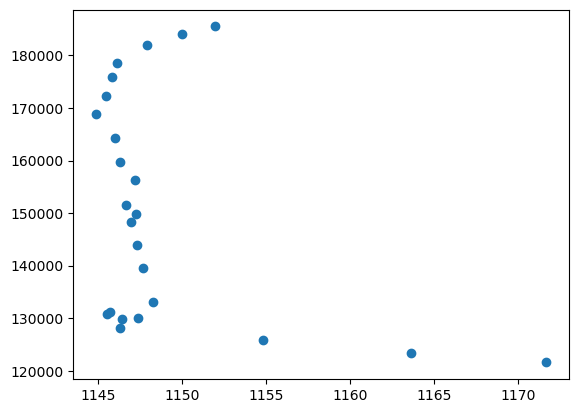

In [1151]:
plt.scatter(Cassava_df['average_rain_fall_mm_per_year'],Cassava_df['Cassava'])

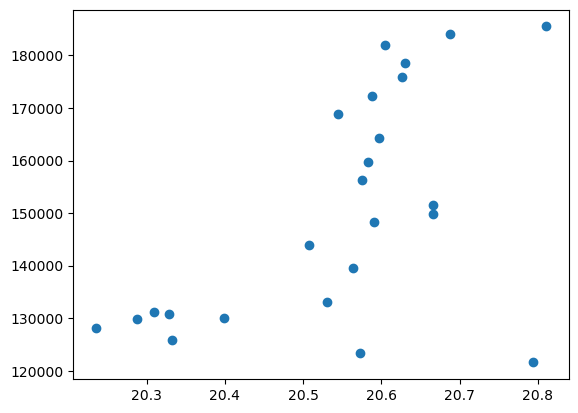

In [1152]:
plt.scatter(Cassava_df['avg_temp'],Cassava_df['Cassava'])

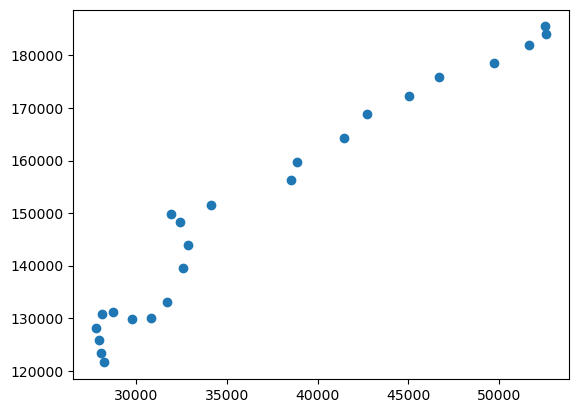

In [1153]:
plt.scatter(Cassava_df['pesticides_tonnes'],Cassava_df['Cassava'])

<Axes: xlabel='pesticides_tonnes', ylabel='Cassava'>

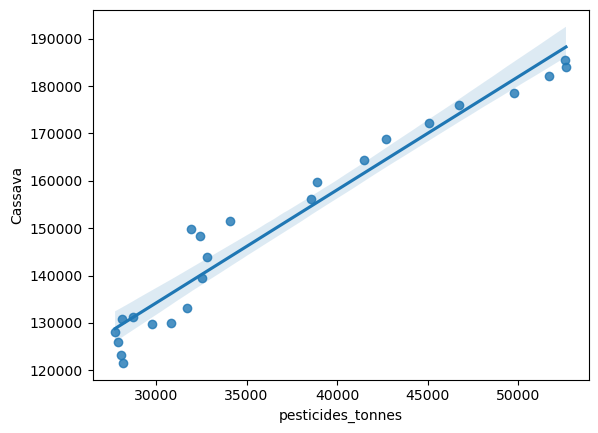

In [1154]:
sns.regplot(x='pesticides_tonnes',y='Cassava',data=Cassava_df )

In [1155]:
df = Cassava_df.dropna()
df['log_cassava'] = np.log(Cassava_df['Cassava'])
df['log_rain_fall'] = np.log(Cassava_df['average_rain_fall_mm_per_year'])
df['log_temp'] = np.log(Cassava_df['avg_temp']) 
df['log_pesticides'] = np.log(Cassava_df['pesticides_tonnes']) 

In [1156]:
X = df[['log_pesticides', 'log_rain_fall','log_temp' ]]
y = df[['log_cassava']]

In [1157]:
X = sm.add_constant(X)

In [1158]:
model = sm.OLS(y, X).fit()

In [1168]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_cassava   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     330.4
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           3.36e-17
Time:                        16:19:45   Log-Likelihood:                 60.378
No. Observations:                  24   AIC:                            -112.8
Df Residuals:                      20   BIC:                            -108.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             40.7267      6.687      6.

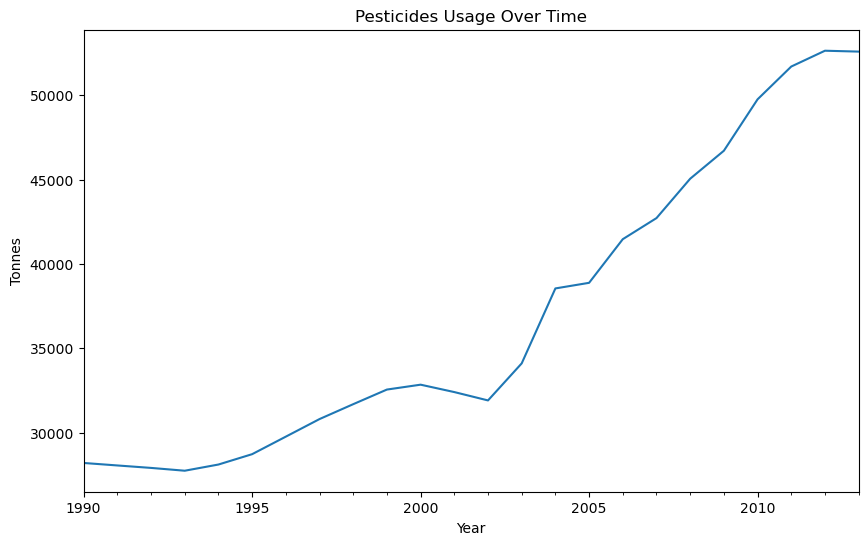

In [1205]:
# Select the target variable for forecasting
target_variable = 'pesticides_tonnes'
data = Cassava_df[target_variable]

# Visualize the time series
data.plot(figsize=(10, 6), title='Pesticides Usage Over Time', xlabel='Year', ylabel='Tonnes')
plt.show()

In [1206]:
explicative_variables= Cassava_df[['average_rain_fall_mm_per_year',	'avg_temp','pesticides_tonnes']]

In [1207]:
explicative_variables

,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,
1990-12-31,1171.666237,20.794261,28201.103522
1991-12-31,1163.629556,20.572277,28053.536920
1992-12-31,1154.795708,20.331898,27908.073232
1993-12-31,1146.327948,20.234592,27741.432148
1994-12-31,1145.523346,20.327929,28108.445104
1995-12-31,1145.731862,20.309935,28722.287258
1996-12-31,1146.420582,20.288068,29761.461467
1997-12-31,1147.397628,20.398693,30803.006662
1998-12-31,1148.264610,20.530045,31685.314601


In [1211]:
explicative_variables.to_csv("Crops_ExV.csv",index=False)

In [1212]:
pesticides_df= pd.read_csv("pesticides_tonnes.csv")
pesticides_df

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
0,53798.791405,52194.974637,55402.608173,51345.965325,56251.617486
1,55015.412420,52392.273519,57638.551321,51003.667665,59027.157176
2,56232.033435,52575.357231,59888.709640,50639.629777,61824.437094
3,57448.654451,52706.409181,62190.899720,50196.016176,64701.292725
4,58665.275466,52776.380989,64554.169943,49658.988560,67671.562372
5,59881.896481,52783.499675,66980.293287,49025.835389,70737.957573
6,61098.517496,52728.406396,69468.628596,48297.537228,73899.497764
7,62315.138511,52612.611085,72017.665937,47476.403321,77153.873702
8,63531.759526,52437.911431,74625.607621,46565.182994,80498.336058
9,64748.380541,52206.154519,77290.606564,45566.701122,83930.059961


In [1213]:
time_index = pd.date_range(start='2014', periods=len(pesticides_df), freq='Y')

In [1214]:
pesticides_df.index = time_index
pesticides_df.index.name = 'Year'
pesticides_df

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
Year,,,,,
2014-12-31,53798.791405,52194.974637,55402.608173,51345.965325,56251.617486
2015-12-31,55015.412420,52392.273519,57638.551321,51003.667665,59027.157176
2016-12-31,56232.033435,52575.357231,59888.709640,50639.629777,61824.437094
2017-12-31,57448.654451,52706.409181,62190.899720,50196.016176,64701.292725
2018-12-31,58665.275466,52776.380989,64554.169943,49658.988560,67671.562372
2019-12-31,59881.896481,52783.499675,66980.293287,49025.835389,70737.957573
2020-12-31,61098.517496,52728.406396,69468.628596,48297.537228,73899.497764
2021-12-31,62315.138511,52612.611085,72017.665937,47476.403321,77153.873702
2022-12-31,63531.759526,52437.911431,74625.607621,46565.182994,80498.336058


In [1215]:
temperature_df= pd.read_csv("average_temp.csv")
temperature_df

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
0,20.837758,20.741109,20.934407,20.689946,20.985570
1,20.837758,20.632716,21.042800,20.524173,21.151343
2,20.837758,20.564365,21.111151,20.419640,21.255876
3,20.837758,20.509970,21.165546,20.336450,21.339066
4,20.837758,20.463397,21.212119,20.265222,21.410294
5,20.837758,20.422009,21.253507,20.201924,21.473592
6,20.837758,20.384383,21.291133,20.144381,21.531135
7,20.837758,20.349649,21.325866,20.091260,21.584256
8,20.837758,20.317228,21.358288,20.041676,21.633839
9,20.837758,20.286711,21.388805,19.995005,21.680511


In [1216]:
time_index = pd.date_range(start='2014', periods=len(temperature_df), freq='Y')

In [1217]:
temperature_df.index = time_index
temperature_df.index.name = 'Year'
temperature_df

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
Year,,,,,
2014-12-31,20.837758,20.741109,20.934407,20.689946,20.985570
2015-12-31,20.837758,20.632716,21.042800,20.524173,21.151343
2016-12-31,20.837758,20.564365,21.111151,20.419640,21.255876
2017-12-31,20.837758,20.509970,21.165546,20.336450,21.339066
2018-12-31,20.837758,20.463397,21.212119,20.265222,21.410294
2019-12-31,20.837758,20.422009,21.253507,20.201924,21.473592
2020-12-31,20.837758,20.384383,21.291133,20.144381,21.531135
2021-12-31,20.837758,20.349649,21.325866,20.091260,21.584256
2022-12-31,20.837758,20.317228,21.358288,20.041676,21.633839


In [1218]:
rain_df= pd.read_csv("average_rain_fall.csv")
rain_df

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
0,1153.892874,1151.545103,1156.240645,1150.302268,1157.483480
1,1155.543265,1150.698907,1160.387623,1148.134458,1162.952071
2,1156.825095,1149.459401,1164.190789,1145.560238,1168.089952
3,1157.662749,1148.018940,1167.306558,1142.913816,1172.411682
4,1158.028311,1146.523608,1169.533014,1140.433386,1175.623236
5,1157.939020,1145.074783,1170.803256,1138.264868,1177.613171
6,1157.450950,1143.727842,1171.174058,1136.463267,1178.438633
7,1156.649898,1142.493042,1170.806754,1134.998855,1178.300941
8,1155.640564,1141.342703,1169.938426,1133.773872,1177.507257
9,1154.535200,1140.228405,1168.841994,1132.654846,1176.415553


In [1219]:
time_index = pd.date_range(start='2014', periods=len(rain_df), freq='Y')

In [1220]:
rain_df.index = time_index
rain_df.index.name = 'Year'
rain_df

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
Year,,,,,
2014-12-31,1153.892874,1151.545103,1156.240645,1150.302268,1157.483480
2015-12-31,1155.543265,1150.698907,1160.387623,1148.134458,1162.952071
2016-12-31,1156.825095,1149.459401,1164.190789,1145.560238,1168.089952
2017-12-31,1157.662749,1148.018940,1167.306558,1142.913816,1172.411682
2018-12-31,1158.028311,1146.523608,1169.533014,1140.433386,1175.623236
2019-12-31,1157.939020,1145.074783,1170.803256,1138.264868,1177.613171
2020-12-31,1157.450950,1143.727842,1171.174058,1136.463267,1178.438633
2021-12-31,1156.649898,1142.493042,1170.806754,1134.998855,1178.300941
2022-12-31,1155.640564,1141.342703,1169.938426,1133.773872,1177.507257


In [1221]:
Cassava_df

,Cassava,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,,
1990-12-31,121572.750000,1171.666237,20.794261,28201.103522
1991-12-31,123299.005618,1163.629556,20.572277,28053.536920
1992-12-31,125874.613338,1154.795708,20.331898,27908.073232
1993-12-31,128100.011236,1146.327948,20.234592,27741.432148
1994-12-31,130866.880150,1145.523346,20.327929,28108.445104
1995-12-31,131188.857678,1145.731862,20.309935,28722.287258
1996-12-31,129782.659176,1146.420582,20.288068,29761.461467
1997-12-31,130039.022472,1147.397628,20.398693,30803.006662
1998-12-31,133173.426966,1148.264610,20.530045,31685.314601


In [1222]:
new_time_index = pd.date_range(start='2014-12-31', end='2023-12-31', freq='Y')

In [1223]:
expanded_df = Cassava_df.reindex(new_time_index)
expanded_df.index.name = 'Year'
expanded_df

,Cassava,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-12-31,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN
2022-12-31,NaN,NaN,NaN,NaN


In [1224]:
merged_df = pd.merge(pesticides_df['Point.Forecast'], expanded_df , on='Year')
merged_df = pd.merge(merged_df, temperature_df[['Point.Forecast']] , on='Year')
merged_df = pd.merge(merged_df, rain_df[['Point.Forecast']], on='Year')


In [1225]:
merged_df

,Point.Forecast_x,Cassava,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes,Point.Forecast_y,Point.Forecast
Year,,,,,,,
2014-12-31,53798.791405,NaN,NaN,NaN,NaN,20.837758,1153.892874
2015-12-31,55015.412420,NaN,NaN,NaN,NaN,20.837758,1155.543265
2016-12-31,56232.033435,NaN,NaN,NaN,NaN,20.837758,1156.825095
2017-12-31,57448.654451,NaN,NaN,NaN,NaN,20.837758,1157.662749
2018-12-31,58665.275466,NaN,NaN,NaN,NaN,20.837758,1158.028311
2019-12-31,59881.896481,NaN,NaN,NaN,NaN,20.837758,1157.939020
2020-12-31,61098.517496,NaN,NaN,NaN,NaN,20.837758,1157.450950
2021-12-31,62315.138511,NaN,NaN,NaN,NaN,20.837758,1156.649898
2022-12-31,63531.759526,NaN,NaN,NaN,NaN,20.837758,1155.640564


In [1226]:
merged_df.drop(columns=['average_rain_fall_mm_per_year', 'avg_temp','pesticides_tonnes'], inplace=True)

In [1227]:
merged_df

,Point.Forecast_x,Cassava,Point.Forecast_y,Point.Forecast
Year,,,,
2014-12-31,53798.791405,NaN,20.837758,1153.892874
2015-12-31,55015.412420,NaN,20.837758,1155.543265
2016-12-31,56232.033435,NaN,20.837758,1156.825095
2017-12-31,57448.654451,NaN,20.837758,1157.662749
2018-12-31,58665.275466,NaN,20.837758,1158.028311
2019-12-31,59881.896481,NaN,20.837758,1157.939020
2020-12-31,61098.517496,NaN,20.837758,1157.450950
2021-12-31,62315.138511,NaN,20.837758,1156.649898
2022-12-31,63531.759526,NaN,20.837758,1155.640564


In [1228]:
merged_df.rename(columns={'Point.Forecast_y': 'avg_temp', 'Point.Forecast': 'average_rain_fall_mm_per_year','Point.Forecast_x':'pesticides_tonnes'}, inplace=True)



In [1229]:
merged_df

,pesticides_tonnes,Cassava,avg_temp,average_rain_fall_mm_per_year
Year,,,,
2014-12-31,53798.791405,NaN,20.837758,1153.892874
2015-12-31,55015.412420,NaN,20.837758,1155.543265
2016-12-31,56232.033435,NaN,20.837758,1156.825095
2017-12-31,57448.654451,NaN,20.837758,1157.662749
2018-12-31,58665.275466,NaN,20.837758,1158.028311
2019-12-31,59881.896481,NaN,20.837758,1157.939020
2020-12-31,61098.517496,NaN,20.837758,1157.450950
2021-12-31,62315.138511,NaN,20.837758,1156.649898
2022-12-31,63531.759526,NaN,20.837758,1155.640564


In [1230]:
ExpCassava_df= merged_df[['Cassava', 'average_rain_fall_mm_per_year','avg_temp','pesticides_tonnes']]
ExpCassava_df

,Cassava,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,,
2014-12-31,NaN,1153.892874,20.837758,53798.791405
2015-12-31,NaN,1155.543265,20.837758,55015.412420
2016-12-31,NaN,1156.825095,20.837758,56232.033435
2017-12-31,NaN,1157.662749,20.837758,57448.654451
2018-12-31,NaN,1158.028311,20.837758,58665.275466
2019-12-31,NaN,1157.939020,20.837758,59881.896481
2020-12-31,NaN,1157.450950,20.837758,61098.517496
2021-12-31,NaN,1156.649898,20.837758,62315.138511
2022-12-31,NaN,1155.640564,20.837758,63531.759526


In [1231]:
combined_table = pd.concat([Cassava_df, ExpCassava_df], ignore_index=True)
combined_table

,Cassava,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
0,121572.750000,1171.666237,20.794261,28201.103522
1,123299.005618,1163.629556,20.572277,28053.536920
2,125874.613338,1154.795708,20.331898,27908.073232
3,128100.011236,1146.327948,20.234592,27741.432148
4,130866.880150,1145.523346,20.327929,28108.445104
5,131188.857678,1145.731862,20.309935,28722.287258
6,129782.659176,1146.420582,20.288068,29761.461467
7,130039.022472,1147.397628,20.398693,30803.006662
8,133173.426966,1148.264610,20.530045,31685.314601
9,139500.973783,1147.711103,20.564403,32551.921224


In [1232]:
time_index = pd.date_range(start='1990', periods=len(combined_table), freq='Y')

In [1233]:
combined_table.index = time_index
combined_table.index.name = 'Year'
NewCassava_df=combined_table
NewCassava_df

,Cassava,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,,
1990-12-31,121572.750000,1171.666237,20.794261,28201.103522
1991-12-31,123299.005618,1163.629556,20.572277,28053.536920
1992-12-31,125874.613338,1154.795708,20.331898,27908.073232
1993-12-31,128100.011236,1146.327948,20.234592,27741.432148
1994-12-31,130866.880150,1145.523346,20.327929,28108.445104
1995-12-31,131188.857678,1145.731862,20.309935,28722.287258
1996-12-31,129782.659176,1146.420582,20.288068,29761.461467
1997-12-31,130039.022472,1147.397628,20.398693,30803.006662
1998-12-31,133173.426966,1148.264610,20.530045,31685.314601


In [1234]:
Log_Cassava= np.log(NewCassava_df)

In [1235]:
Log_Cassava

,Cassava,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
Year,,,,
1990-12-31,11.708268,7.066182,3.034677,10.247116
1991-12-31,11.722368,7.059299,3.023944,10.241870
1992-12-31,11.743042,7.051679,3.012191,10.236671
1993-12-31,11.760567,7.044319,3.007394,10.230682
1994-12-31,11.781936,7.043617,3.011996,10.243825
1995-12-31,11.784393,7.043799,3.011110,10.265429
1996-12-31,11.773616,7.044400,3.010033,10.300970
1997-12-31,11.775590,7.045252,3.015471,10.335368
1998-12-31,11.799408,7.046007,3.021889,10.363609


In [1236]:
const= 40.7267
log_pesticides= 0.4903
log_rain_fall= -6.4391
log_temp= 3.7775

In [1237]:

def predict_cassava(row):
    if pd.isna(row['Cassava']):
        log_cassava = (
            const 
            + log_pesticides * row['pesticides_tonnes'] 
            + log_rain_fall * row['average_rain_fall_mm_per_year']
            + log_temp * row['avg_temp']
        )  
        return np.exp(log_cassava)
    return row['Cassava']


In [1238]:
Log_Cassava['Cassava'] = Log_Cassava.apply(predict_cassava, axis=1)

In [1239]:
Cassava_ts= Log_Cassava[['Cassava']]

In [1240]:
interval1 = NewCassava_df.loc['1990':'2013']
interval2= Cassava_ts.loc['2014':'2023']

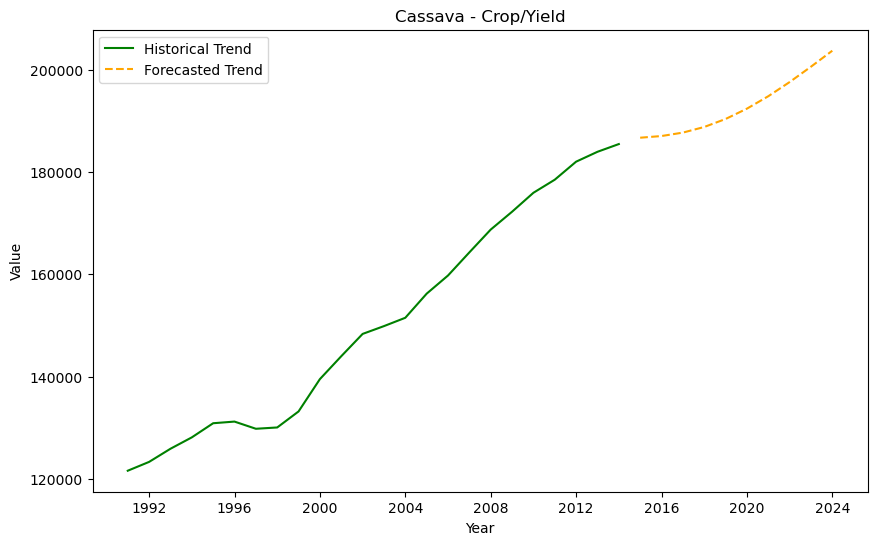

In [1241]:
plt.figure(figsize=(10, 6))
plt.plot(interval1.index, interval1['Cassava'], label="Historical Trend", color='green')
plt.plot(interval2.index, interval2['Cassava'], label="Forecasted Trend", color='orange', linestyle='--')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Cassava - Crop/Yield')
plt.show()